## Analysis of Hyperparameter tuning of vgg16 based CNN model

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Define a function to parse each line of the text file
def parse_line(line):
    # Use ast.literal_eval to convert the string representation of the list into a Python list
    parsed_line = ast.literal_eval(line)
    # Extract the dictionary and tuple from the parsed line and return them as separate values
    return parsed_line[0], parsed_line[1]

# Load the text file into a list of lines
with open(r'C:\Users\mandy\Documents\MIDS\W207\W207MammogramProject\results_cnn_random_search.txt') as f:
    lines = f.readlines()

# Parse each line using the parse_line function
parsed_lines = [parse_line(line) for line in lines]

# Convert the list of parsed lines into a pandas DataFrame
df = pd.DataFrame(parsed_lines)

# Convert the first column of the DataFrame, which contains the dictionary, into separate columns
df = pd.concat([df.drop([0], axis=1), df[0].apply(pd.Series)], axis=1)

# Combine the results column with the DataFrame
df = pd.concat([df, df.pop(1).apply(pd.Series)], axis=1)

df = df.rename(columns={0: 'accuracy'})
df = df.rename(columns={1: 'f1_score'})

# create a LabelEncoder object
le = LabelEncoder()

# Insert the new column next to the old column
opt_idx = df.columns.get_loc('optimizer')
df.insert(opt_idx + 1, 'optimizer_encoded', le.fit_transform(df['optimizer']))

# Print the resulting DataFrame
print(df.head())


   num_units  dropout_rate optimizer  optimizer_encoded  n_epochs  batch_size  \
0        128           0.0    Adamax                  0         5         100   
1        128           0.0    Adamax                  0        20          10   
2         32           0.0       sgd                  3        10          10   
3        128           0.0       sgd                  3         5          50   
4         32           0.6    Adamax                  0        10         500   

   class_weight_binary  pool_size  n_augm  accuracy  f1_score  
0                    0          2     200  0.851786  0.119381  
1                    0          4     200  0.873214  0.049702  
2                    1          4    1800  0.663393  0.166511  
3                    0          2     200  0.897321  0.000000  
4                    1          4     200  0.505357  0.164291  


C:\Users\mandy\AppData\Local\Temp\ipykernel_26472\4158943963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

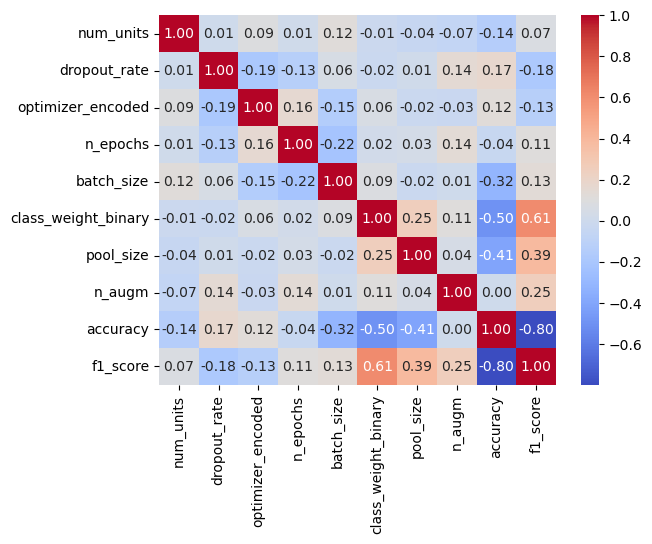

In [3]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap with Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [4]:
print(df.shape)
# There were 61 experiments run on this model for the purpose of hyperparameter tuning

(61, 11)


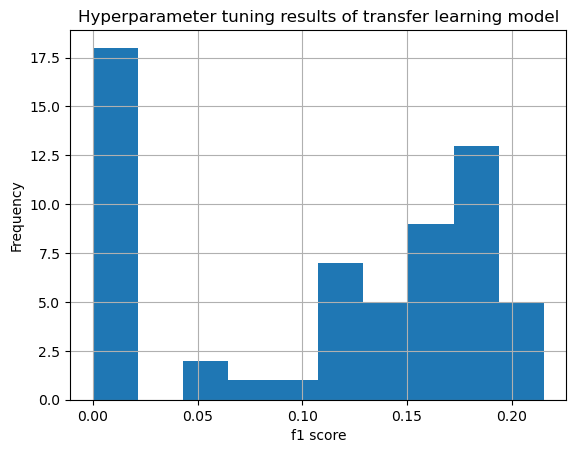

In [5]:
# Plot a histogram
df['f1_score'].hist()
plt.title('Hyperparameter tuning results of transfer learning model')
plt.xlabel('f1 score')
plt.ylabel('Frequency')
plt.show()

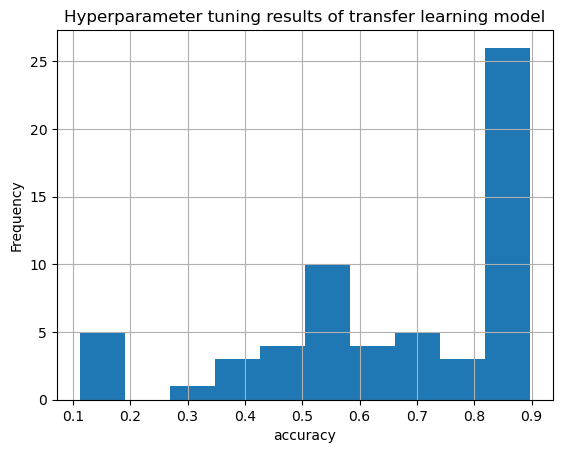

In [6]:
# Plot a histogram
df['accuracy'].hist()
plt.title('Hyperparameter tuning results of transfer learning model')
plt.xlabel('accuracy')
plt.ylabel('Frequency')
plt.show()

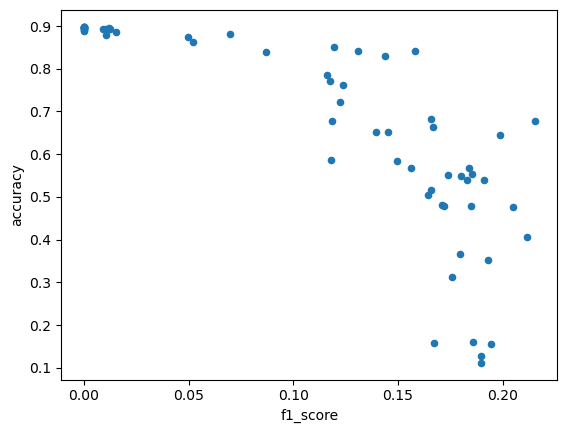

In [7]:
df.plot(kind='scatter', x='f1_score', y='accuracy')
plt.show()

## Top 3 models info - based on f1 score

In [8]:
top_3 = df.sort_values(by='f1_score', ascending=False).head(3)
print(top_3)

    num_units  dropout_rate optimizer  optimizer_encoded  n_epochs  \
49       1024           0.9   RMSprop                  1        10   
54        512           0.6   RMSprop                  1        10   
45         32           0.0    Adamax                  0        10   

    batch_size  class_weight_binary  pool_size  n_augm  accuracy  f1_score  
49         100                    1          4    1800  0.676786  0.215342  
54         100                    0          2    1800  0.405357  0.211605  
45          50                    1          4     200  0.475893  0.204862  


## Effect of class weights on f1 score

In [9]:
print(df['class_weight_binary'].value_counts())

0    31
1    30
Name: class_weight_binary, dtype: int64


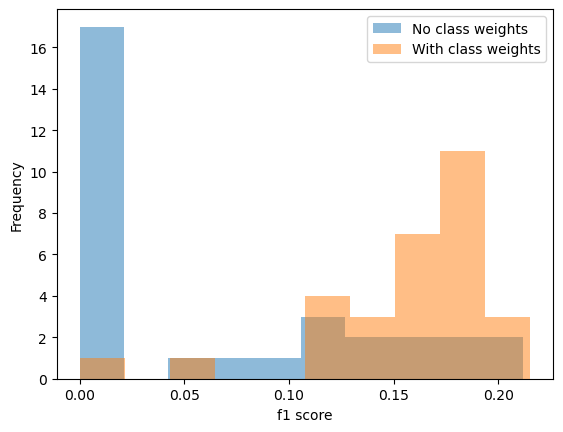

In [10]:
# Create two subsets of the DataFrame based on the value of use of class weights or not
subset_0 = df[df['class_weight_binary'] == 0]
subset_1 = df[df['class_weight_binary'] == 1]

# Plot the two histograms together with a semi-transparent fill to show overlap
plt.hist(subset_0['f1_score'], alpha=0.5, label='No class weights')
plt.hist(subset_1['f1_score'], alpha=0.5, label='With class weights')

# Add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('f1 score')
plt.ylabel('Frequency')

# Show the plot
plt.show()


## Effect of pool size on f1 score

4    35
2    26
Name: pool_size, dtype: int64


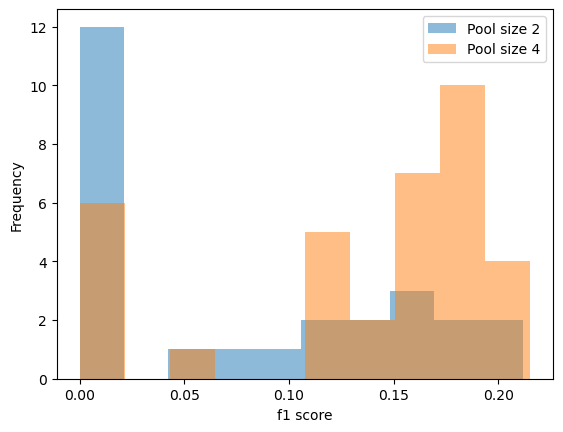

In [11]:
# Determine pool_size options
print(df['pool_size'].value_counts())

# Create two subsets of the DataFrame based on the value of use of class weights or not
subset_0 = df[df['pool_size'] == 2]
subset_1 = df[df['pool_size'] == 4]

# Plot the two histograms together with a semi-transparent fill to show overlap
plt.hist(subset_0['f1_score'], alpha=0.5, label='Pool size 2')
plt.hist(subset_1['f1_score'], alpha=0.5, label='Pool size 4')

# Add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('f1 score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [12]:
# Determine n_augm options
print(df['n_augm'].value_counts())

200     36
1800    25
Name: n_augm, dtype: int64


## Effect of aumentation images on f1 score

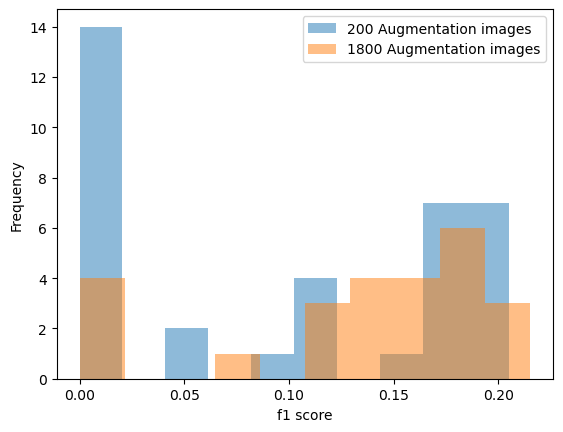

In [13]:
# Create two subsets of the DataFrame based on the value of use of class weights or not
subset_0 = df[df['n_augm'] == 200]
subset_1 = df[df['n_augm'] == 1800]

# Plot the two histograms together with a semi-transparent fill to show overlap
plt.hist(subset_0['f1_score'], alpha=0.5, label='200 Augmentation images')
plt.hist(subset_1['f1_score'], alpha=0.5, label='1800 Augmentation images')

# Add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('f1 score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Effect of dropout rate on f1 score

In [14]:
# Determine dropout rate options
print(df['dropout_rate'].value_counts())

0.0    20
0.6    16
0.9    13
0.3    12
Name: dropout_rate, dtype: int64


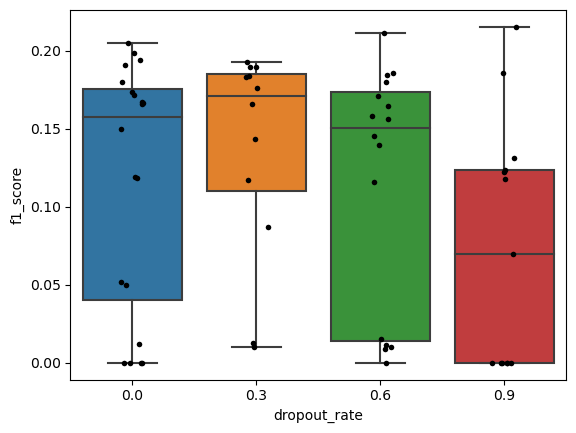

In [15]:
# Create a boxplot 
sns.boxplot(x=df['dropout_rate'], y=df['f1_score'])
sns.stripplot(x=df['dropout_rate'], y=df['f1_score'],  color='black', size=4, jitter=True)
plt.show()

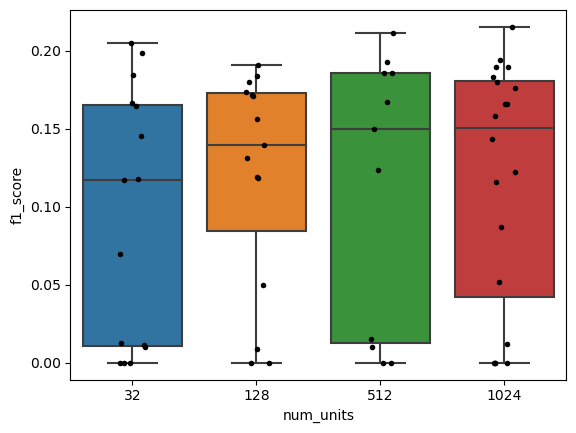

In [27]:
# Boxplot 
sns.boxplot(x=df['num_units'], y=df['f1_score'])
sns.stripplot(x=df['num_units'], y=df['f1_score'],  color='black', size=4, jitter=True)
plt.show()

## Conclusions
#### Definitely use class weights
#### Pool size 4 is better. Maybe try even larger pool sizes
#### Accuracy and f1 score negatively correlated.... 
#### Set dropout rate to 0.3?
#### Try optimizing over auc instead of accuracy
#### Drop vgg16 layer on best model to determine effect

## Analysis on just the results with the class weights

In [16]:
# New dataframe with just the results where the class weights were used
df2 = df[df['class_weight_binary'] == 1]

C:\Users\mandy\AppData\Local\Temp\ipykernel_26472\364988649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


<Axes: >

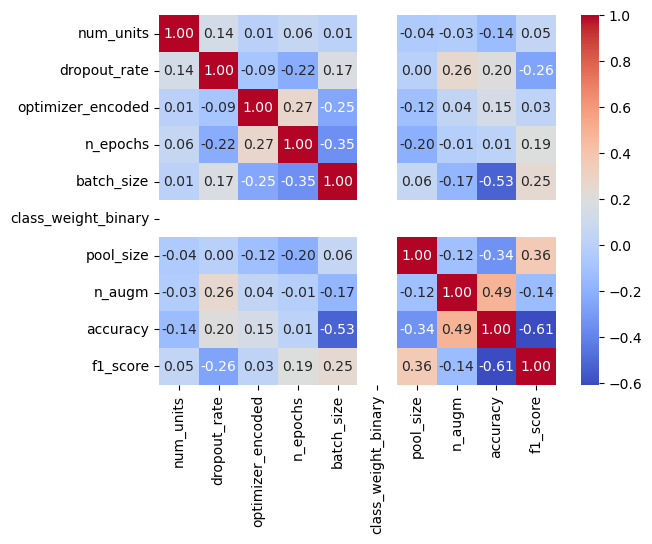

In [17]:
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Create a heatmap with Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

#### On the new dataframe that looks at only models that used class weights, the following have correlations to f1_score: pool_size, dropout_rate, batch_size, n_epochs, maybe n_augm

#### num_units and the optimizer type seems to have no effect on f1_score

4    21
2     9
Name: pool_size, dtype: int64


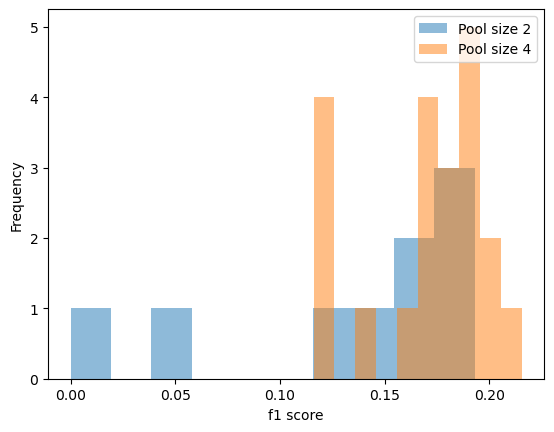

In [18]:
# Determine pool_size options
print(df2['pool_size'].value_counts())

# Create two subsets of the DataFrame based on the value of use of class weights or not
subset_0 = df2[df2['pool_size'] == 2]
subset_1 = df2[df2['pool_size'] == 4]

# Plot the two histograms together with a semi-transparent fill to show overlap
plt.hist(subset_0['f1_score'], alpha=0.5, label='Pool size 2')
plt.hist(subset_1['f1_score'], alpha=0.5, label='Pool size 4')

# Add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('f1 score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

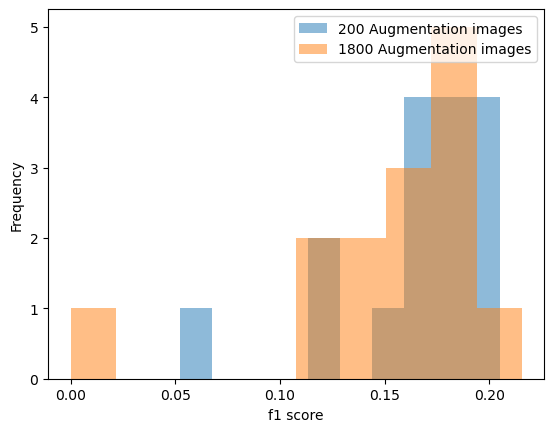

In [19]:
# Create two subsets of the DataFrame based on the value of use of class weights or not
subset_0 = df2[df2['n_augm'] == 200]
subset_1 = df2[df2['n_augm'] == 1800]

# Plot the two histograms together with a semi-transparent fill to show overlap
plt.hist(subset_0['f1_score'], alpha=0.5, label='200 Augmentation images')
plt.hist(subset_1['f1_score'], alpha=0.5, label='1800 Augmentation images')

# Add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('f1 score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

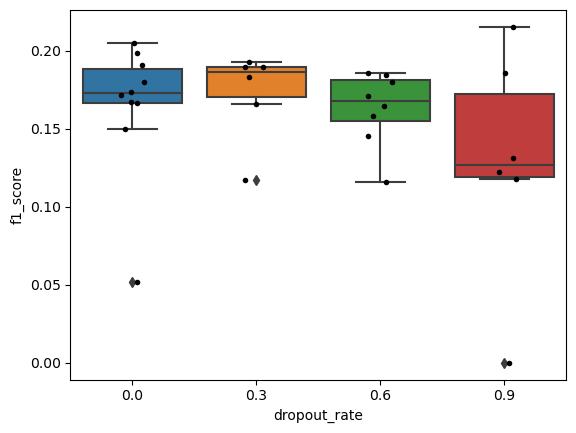

In [20]:
# Create a  boxplot
sns.boxplot(x=df2['dropout_rate'], y=df2['f1_score'])
sns.stripplot(x=df2['dropout_rate'], y=df2['f1_score'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

In [21]:
# Determine batch_size options
print(df2['batch_size'].value_counts())

10     10
50      8
100     7
500     5
Name: batch_size, dtype: int64


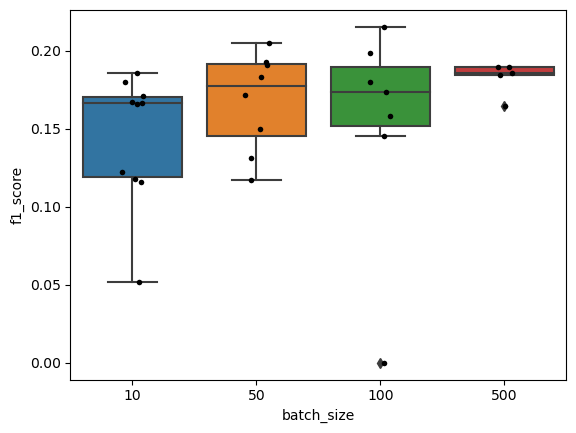

In [22]:
# Create a boxplot
sns.boxplot(x=df2['batch_size'], y=df2['f1_score'])
sns.stripplot(x=df2['batch_size'], y=df2['f1_score'],  color='black', size=4, jitter=True)
plt.show()

In [23]:
# Determine n_epochs options
print(df2['n_epochs'].value_counts())

10    12
20     9
5      9
Name: n_epochs, dtype: int64


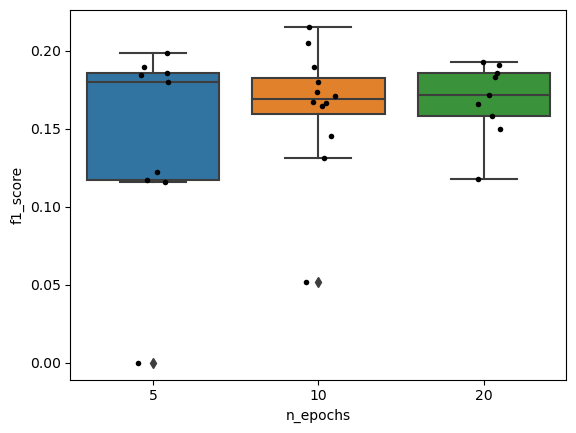

In [24]:
# Create a boxplot
sns.boxplot(x=df2['n_epochs'], y=df2['f1_score'])
sns.stripplot(x=df2['n_epochs'], y=df2['f1_score'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

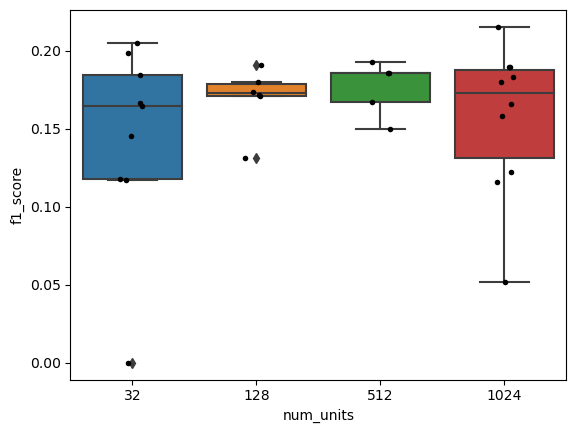

In [25]:
# Create a boxlot
sns.boxplot(x=df2['num_units'], y=df2['f1_score'])
sns.stripplot(x=df2['num_units'], y=df2['f1_score'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

## Conclusions 2
#### Confirm set dropout rate to 0.3
#### Confirm pool size 4 better than pool size 2
#### With use of class weights, augmentation similar with 200 vs 1800 images. 